In [8]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
#importar dados
dataset = pd.read_csv("japan_heart_attack_dataset.csv", sep=",")
#visualizar dados importados
dataset.head()

,Age,Gender,Region,Smoking_History,Diabetes_History,Hypertension_History,Cholesterol_Level,Physical_Activity,Diet_Quality,Alcohol_Consumption,...,Extra_Column_6,Extra_Column_7,Extra_Column_8,Extra_Column_9,Extra_Column_10,Extra_Column_11,Extra_Column_12,Extra_Column_13,Extra_Column_14,Extra_Column_15
0,56,Male,Urban,Yes,No,No,186.400209,Moderate,Poor,Low,...,0.007901,0.794583,0.290779,0.497193,0.521995,0.799657,0.722398,0.148739,0.834010,0.061632
1,69,Male,Urban,No,No,No,185.136747,Low,Good,Low,...,0.083933,0.688951,0.830164,0.634490,0.302043,0.043683,0.451668,0.878671,0.535602,0.617825
2,46,Male,Rural,Yes,No,No,210.696611,Low,Average,Moderate,...,0.227205,0.496344,0.752107,0.181501,0.629180,0.018276,0.063227,0.146512,0.997296,0.974455
3,32,Female,Urban,No,No,No,211.165478,Moderate,Good,High,...,0.403182,0.741409,0.223968,0.329314,0.143191,0.907781,0.542322,0.922461,0.626217,0.228606
4,60,Female,Rural,No,No,No,223.814253,High,Good,High,...,0.689787,0.904574,0.757098,0.337761,0.362375,0.728552,0.176699,0.484749,0.312091,0.452809


In [366]:
#tamanho
dataset.shape

(30000, 32)

In [374]:
#visualizar
dataset.head()

,Age,Gender,Region,Smoking_History,Diabetes_History,Hypertension_History,Cholesterol_Level,Physical_Activity,Diet_Quality,Alcohol_Consumption,...,Extra_Column_6,Extra_Column_7,Extra_Column_8,Extra_Column_9,Extra_Column_10,Extra_Column_11,Extra_Column_12,Extra_Column_13,Extra_Column_14,Extra_Column_15
0,56,Male,Urban,Yes,No,No,186.400209,Moderate,Poor,Low,...,0.007901,0.794583,0.290779,0.497193,0.521995,0.799657,0.722398,0.148739,0.834010,0.061632
1,69,Male,Urban,No,No,No,185.136747,Low,Good,Low,...,0.083933,0.688951,0.830164,0.634490,0.302043,0.043683,0.451668,0.878671,0.535602,0.617825
2,46,Male,Rural,Yes,No,No,210.696611,Low,Average,Moderate,...,0.227205,0.496344,0.752107,0.181501,0.629180,0.018276,0.063227,0.146512,0.997296,0.974455
3,32,Female,Urban,No,No,No,211.165478,Moderate,Good,High,...,0.403182,0.741409,0.223968,0.329314,0.143191,0.907781,0.542322,0.922461,0.626217,0.228606
4,60,Female,Rural,No,No,No,223.814253,High,Good,High,...,0.689787,0.904574,0.757098,0.337761,0.362375,0.728552,0.176699,0.484749,0.312091,0.452809


In [11]:
dataset.columns = ['Idade', 'sexo', 'regiao', 'historia_de_tabagismo', 'historia_de_diabetes', 'história_de_hipertensao', 
                   'nível_de_colesterol', 'atividade_física', 'qualidade_da_dieta', 'consumo_de_álcool', 
                   'coluna_extra1', 'coluna_extra2', 'coluna_extra3', 'coluna_extra4', 'coluna_extra5', 
                   'coluna_extra6', 'coluna_extra7', 'coluna_extra8', 'coluna_extra9', 'coluna_extra10', 
                   'coluna_extra11', 'coluna_extra12', 'coluna_extra13', 'coluna_extra14', 'coluna_extra15', 
                   'coluna_extra16', 'coluna_extra17', 'coluna_extra18', 'coluna_extra19', 'coluna_extra20', 
                   'coluna_extra21', 'coluna_extra22']


In [12]:
dataset.head(10)

,Idade,sexo,regiao,historia_de_tabagismo,historia_de_diabetes,história_de_hipertensao,nível_de_colesterol,atividade_física,qualidade_da_dieta,consumo_de_álcool,...,coluna_extra13,coluna_extra14,coluna_extra15,coluna_extra16,coluna_extra17,coluna_extra18,coluna_extra19,coluna_extra20,coluna_extra21,coluna_extra22
0,56,Male,Urban,Yes,No,No,186.400209,Moderate,Poor,Low,...,0.007901,0.794583,0.290779,0.497193,0.521995,0.799657,0.722398,0.148739,0.834010,0.061632
1,69,Male,Urban,No,No,No,185.136747,Low,Good,Low,...,0.083933,0.688951,0.830164,0.634490,0.302043,0.043683,0.451668,0.878671,0.535602,0.617825
2,46,Male,Rural,Yes,No,No,210.696611,Low,Average,Moderate,...,0.227205,0.496344,0.752107,0.181501,0.629180,0.018276,0.063227,0.146512,0.997296,0.974455
3,32,Female,Urban,No,No,No,211.165478,Moderate,Good,High,...,0.403182,0.741409,0.223968,0.329314,0.143191,0.907781,0.542322,0.922461,0.626217,0.228606
4,60,Female,Rural,No,No,No,223.814253,High,Good,High,...,0.689787,0.904574,0.757098,0.337761,0.362375,0.728552,0.176699,0.484749,0.312091,0.452809
5,25,Female,Rural,No,No,No,220.340040,Low,Good,High,...,0.448359,0.369056,0.195817,0.395948,0.835430,0.003596,0.941448,0.875736,0.718697,0.008745
6,78,Male,Urban,No,Yes,Yes,176.534859,High,Poor,High,...,0.662466,0.708291,0.120272,0.072657,0.342915,0.070717,0.328066,0.706978,0.370973,0.128143
7,38,Female,Urban,Yes,No,No,203.443219,High,Poor,NaN,...,0.771378,0.877390,0.659746,0.261927,0.432525,0.873889,0.729492,0.137948,0.116143,0.036758
8,56,Male,Rural,No,No,Yes,214.271573,Moderate,Average,Moderate,...,0.075977,0.200385,0.457953,0.260502,0.359755,0.224467,0.753343,0.238852,0.463294,0.866367
9,75,Male,Urban,No,No,No,183.983885,Moderate,Good,Moderate,...,0.562768,0.013282,0.084734,0.836812,0.550383,0.271020,0.565794,0.159043,0.701713,0.223031


In [386]:
#explorando dados categoricos
#regiao
agrupado = dataset.groupby(['regiao']).size()
agrupado

regiao
Rural     8939
Urban    21061
dtype: int64

<Axes: xlabel='regiao'>

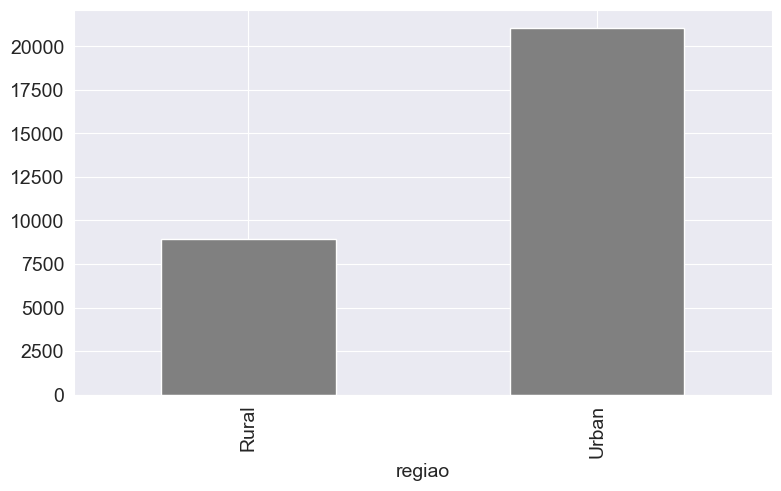

In [388]:
agrupado.plot.bar(color= 'gray')

In [333]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados ocorre mais em zona urbana.

In [392]:
#historico de tabagismo
agrupado = dataset.groupby(['tabagismo_historia']).size()
agrupado

tabagismo_historia
No     21003
Yes     8997
dtype: int64

<Axes: xlabel='tabagismo_historia'>

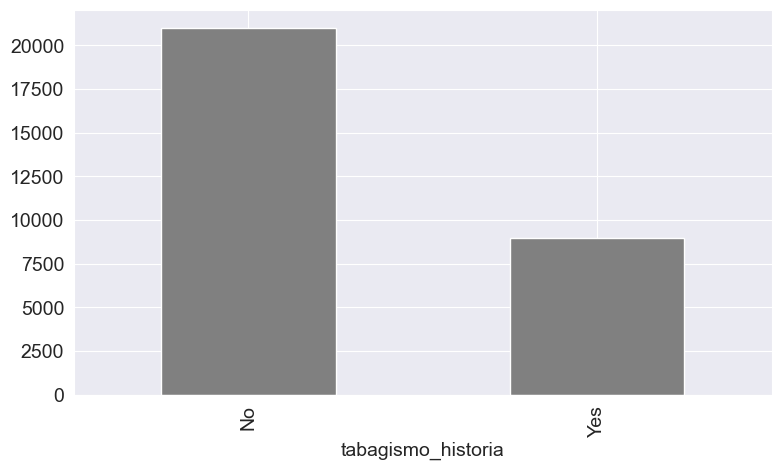

In [394]:
agrupado.plot.bar(color='gray')

In [331]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados não tem histórico de fumar.

In [101]:
#historia de diabetes
agrupado = dataset.groupby(['historia_de_diabetes']).size()
agrupado

historia_de_diabetes
No     23903
Yes     6097
dtype: int64

<Axes: xlabel='historia_de_diabetes'>

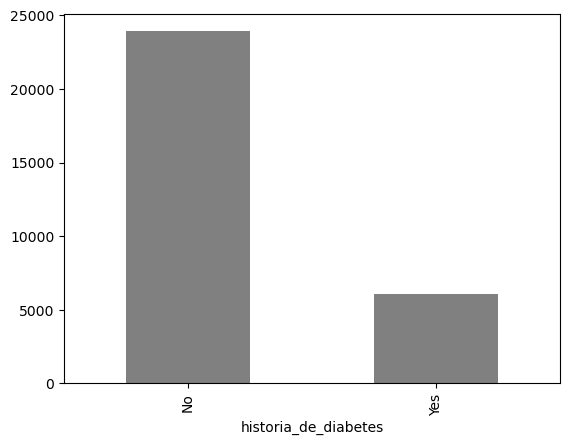

In [103]:
agrupado.plot.bar(color='gray')

In [335]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados não tem histórico de diabetes.

In [105]:
#história de hipertensao
agrupado = dataset.groupby(['história_de_hipertensao']).size()
agrupado

história_de_hipertensao
No     22546
Yes     7454
dtype: int64

história_de_hipertensao
No     22546
Yes     7454
dtype: int64

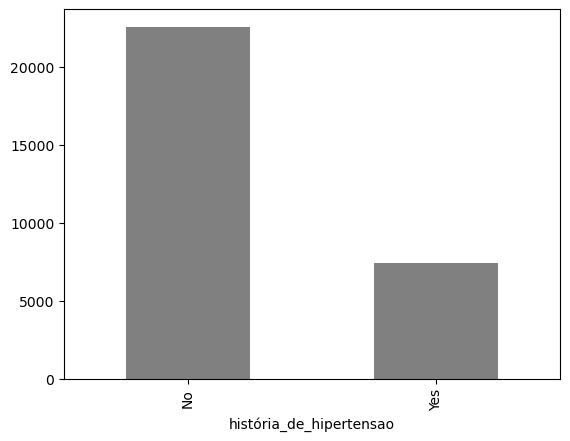

In [107]:
agrupado.plot.bar(color = 'gray')
agrupado

In [337]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados não tem histórico de hipertensão

In [109]:
#atividade física
agrupado = dataset.groupby(['atividade_física']).size()
agrupado

atividade_física
High         9091
Low          8985
Moderate    11924
dtype: int64

atividade_física
High         9091
Low          8985
Moderate    11924
dtype: int64

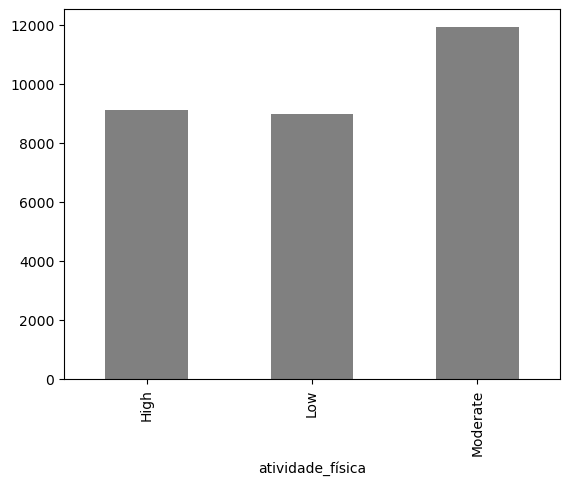

In [111]:
agrupado.plot.bar(color = 'gray')
agrupado

In [339]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados que a maioria das pessoas tinha atividade física moderada.

In [115]:
#qualidade da dieta
agrupado = dataset.groupby(['qualidade_da_dieta']).size()
agrupado

qualidade_da_dieta
Average    11971
Good       12006
Poor        6023
dtype: int64

qualidade_da_dieta
Average    11971
Good       12006
Poor        6023
dtype: int64

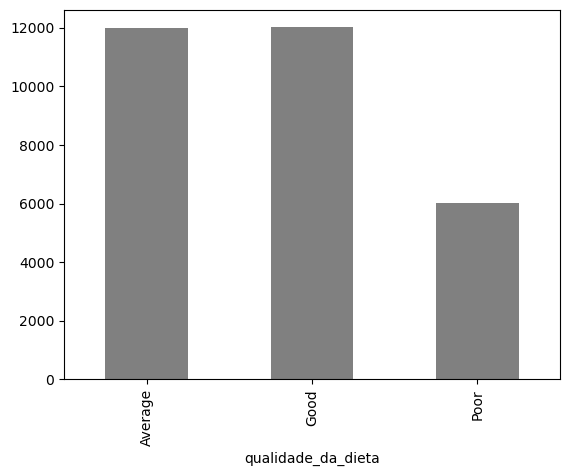

In [117]:
agrupado.plot.bar(color = 'gray')
agrupado

In [341]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados que a maioria das pessoas tinha  a qualidade de dieta boa e moderada.

In [119]:
#consumo de álcool
agrupado = dataset.groupby(['consumo_de_álcool']).size()
agrupado

consumo_de_álcool
High         5828
Low          9098
Moderate    12059
dtype: int64

consumo_de_álcool
High         5828
Low          9098
Moderate    12059
dtype: int64

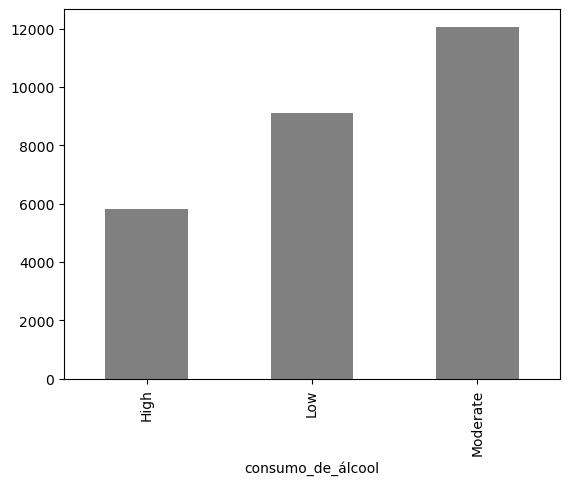

In [123]:
agrupado.plot.bar(color = 'gray')
agrupado

In [343]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados ocorre que o consumo de álcool é moderado.

In [127]:
#explorar colunas numéricas
#idade
dataset['Idade'].describe()

count    30000.000000
mean        48.492300
std         17.902913
min         18.000000
25%         33.000000
50%         48.000000
75%         64.000000
max         79.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

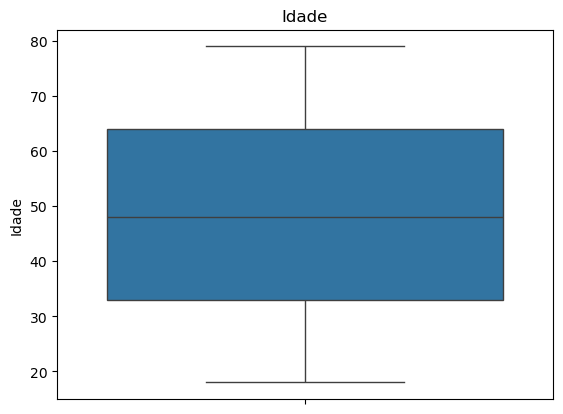

In [129]:
srn.boxplot(dataset['Idade']).set_title('Idade')

In [345]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados que as pessoas estão entre 32 a 65 anos.

In [181]:
#colesterol
dataset['nível_de_colesterol'].describe() 

count    30000.000000
mean       199.899752
std         29.971334
min         80.020033
25%        179.551714
50%        199.774394
75%        220.160757
max        336.863442
Name: nível_de_colesterol, dtype: float64

Text(0.5, 1.0, 'nível_de_colesterol')

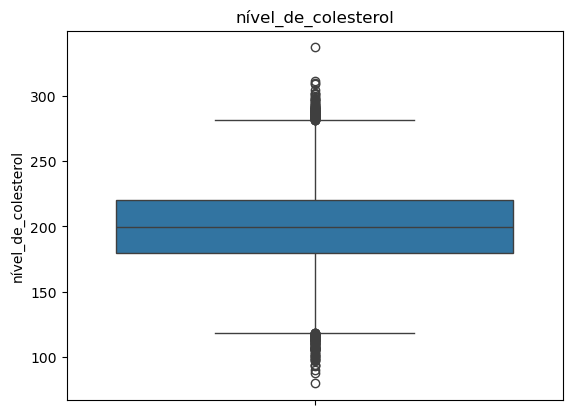

In [183]:
srn.boxplot(dataset['nível_de_colesterol']).set_title('nível_de_colesterol')

Text(0.5, 1.0, 'nível_de_colesterol')

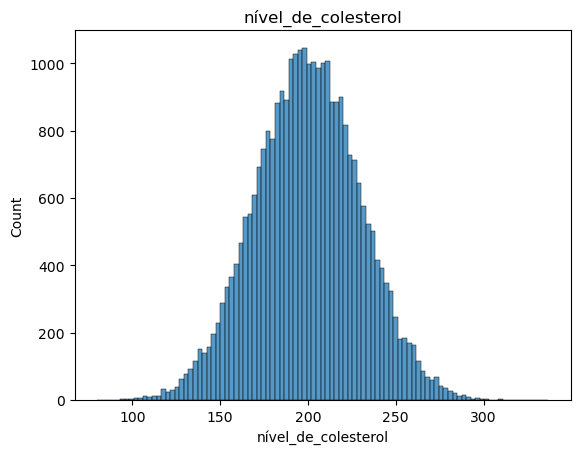

In [167]:
srn.histplot(dataset['nível_de_colesterol']).set_title('nível_de_colesterol')

In [347]:
#concluímos nesse gráfico que a maioria dos casos de ataque cardíaco no Japão nessa base de dados que o nível de colesterol está em 200 ou próximo, sendo assim um grande indicar de que o colesterol alto influencia no ataque cardíaco.

In [271]:
#contando valores NAN
dataset.isnull().sum()

Idade                             0
sexo                          30000
regiao                            0
historia_de_tabagismo             0
historia_de_diabetes              0
história_de_hipertensao           0
nível_de_colesterol               0
atividade_física                  0
qualidade_da_dieta                0
consumo_de_álcool                 0
niveis_de_estresse                0
IMC                               0
frequencia_cardiaca               0
PA_sistolica                      0
PA_diastolica                     0
historia_familiar                 0
ataque_cardiaco_ocorrência        0
Coluna_Extra_1                    0
Coluna_Extra_2                    0
Coluna_Extra_3                    0
Coluna_Extra_4                    0
Coluna_Extra_5                    0
Coluna_Extra_6                    0
Coluna_Extra_7                    0
Coluna_Extra_8                    0
Coluna_Extra_9                    0
Coluna_Extra_10                   0
Coluna_Extra_11             

In [221]:
#remover NAN  
# consumo de alcool
dataset['consumo_de_álcool'].describe()

count        30000
unique           3
top       Moderate
freq         13405
Name: consumo_de_álcool, dtype: object

In [293]:
dataset['consumo_de_álcool']= dataset['consumo_de_álcool'].ffill()

In [295]:
#verificando os NAN novamente
dataset.isnull().sum()

Idade                         0
sexo                          0
regiao                        0
historia_de_tabagismo         0
historia_de_diabetes          0
história_de_hipertensao       0
nível_de_colesterol           0
atividade_física              0
qualidade_da_dieta            0
consumo_de_álcool             0
niveis_de_estresse            0
IMC                           0
frequencia_cardiaca           0
PA_sistolica                  0
PA_diastolica                 0
historia_familiar             0
ataque_cardiaco_ocorrência    0
Coluna_Extra_1                0
Coluna_Extra_2                0
Coluna_Extra_3                0
Coluna_Extra_4                0
Coluna_Extra_5                0
Coluna_Extra_6                0
Coluna_Extra_7                0
Coluna_Extra_8                0
Coluna_Extra_9                0
Coluna_Extra_10               0
Coluna_Extra_11               0
Coluna_Extra_12               0
Coluna_Extra_13               0
Coluna_Extra_14               0
Coluna_E

In [297]:
#verificando padronização do 'sexo'
agrupado = dataset.groupby(['sexo']).size()
agrupado

sexo
Female    14933
Male      15067
dtype: int64

In [309]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
srn.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [311]:
#criar o encoder e aplica oneHotEncoder transformando strings para números.
lb = LabelEncoder()

for var in ['sexo', 'regiao', 'historia_de_tabagismo', 'historia_de_diabetes', 'história_de_hipertensao', 'atividade_física', 'qualidade_da_dieta', 'consumo_de_álcool' ]:
        dataset[var] = lb.fit_transform(dataset[var])

In [313]:
dataset.head(10)

,Idade,sexo,regiao,historia_de_tabagismo,historia_de_diabetes,história_de_hipertensao,nível_de_colesterol,atividade_física,qualidade_da_dieta,consumo_de_álcool,...,Coluna_Extra_6,Coluna_Extra_7,Coluna_Extra_8,Coluna_Extra_9,Coluna_Extra_10,Coluna_Extra_11,Coluna_Extra_12,Coluna_Extra_13,Coluna_Extra_14,Coluna_Extra_15
0,56,1,1,1,0,0,186.400209,2,2,1,...,0.007901,0.794583,0.290779,0.497193,0.521995,0.799657,0.722398,0.148739,0.834010,0.061632
1,69,1,1,0,0,0,185.136747,1,1,1,...,0.083933,0.688951,0.830164,0.634490,0.302043,0.043683,0.451668,0.878671,0.535602,0.617825
2,46,1,0,1,0,0,210.696611,1,0,2,...,0.227205,0.496344,0.752107,0.181501,0.629180,0.018276,0.063227,0.146512,0.997296,0.974455
3,32,0,1,0,0,0,211.165478,2,1,0,...,0.403182,0.741409,0.223968,0.329314,0.143191,0.907781,0.542322,0.922461,0.626217,0.228606
4,60,0,0,0,0,0,223.814253,0,1,0,...,0.689787,0.904574,0.757098,0.337761,0.362375,0.728552,0.176699,0.484749,0.312091,0.452809
5,25,0,0,0,0,0,220.340040,1,1,0,...,0.448359,0.369056,0.195817,0.395948,0.835430,0.003596,0.941448,0.875736,0.718697,0.008745
6,78,1,1,0,1,1,176.534859,0,2,0,...,0.662466,0.708291,0.120272,0.072657,0.342915,0.070717,0.328066,0.706978,0.370973,0.128143
7,38,0,1,1,0,0,203.443219,0,2,0,...,0.771378,0.877390,0.659746,0.261927,0.432525,0.873889,0.729492,0.137948,0.116143,0.036758
8,56,1,0,0,0,1,214.271573,2,0,2,...,0.075977,0.200385,0.457953,0.260502,0.359755,0.224467,0.753343,0.238852,0.463294,0.866367
9,75,1,1,0,0,0,183.983885,2,1,2,...,0.562768,0.013282,0.084734,0.836812,0.550383,0.271020,0.565794,0.159043,0.701713,0.223031


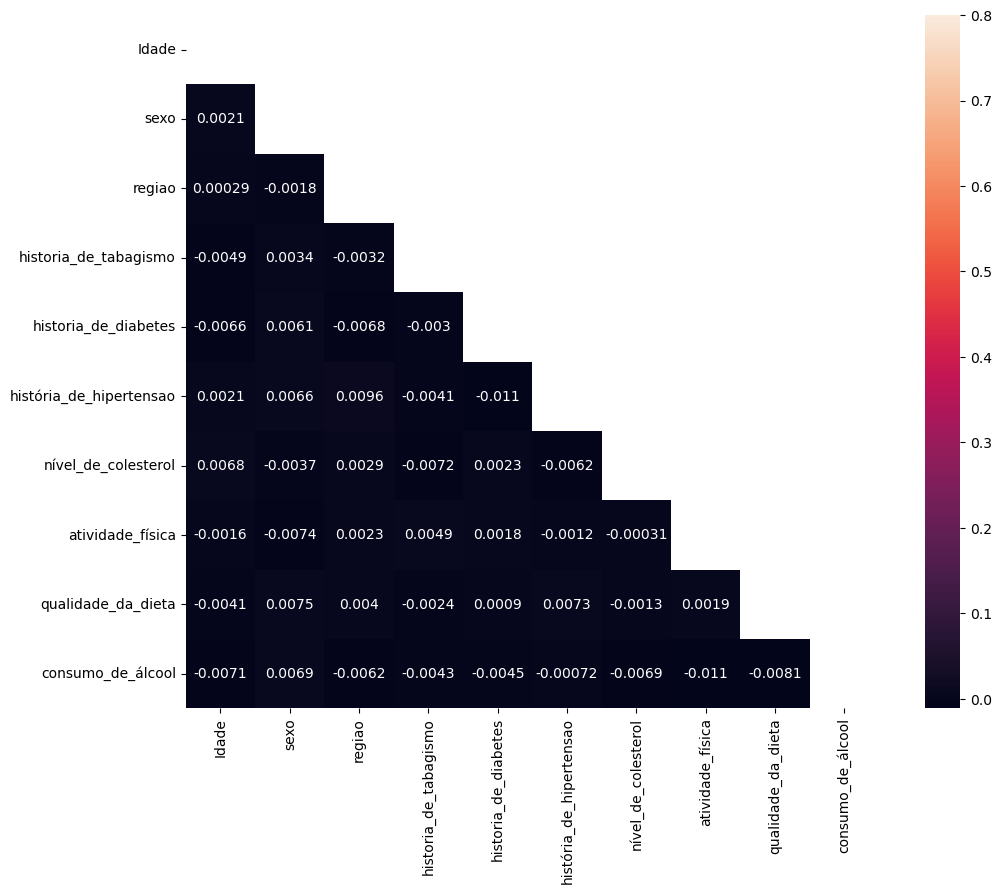

In [19]:
#criando lista para mapa de calor que mostra a correlação entre as variáveis correlacionando maior chance de serem duas variáveis relacionadas, mas não necessariamente.
list_dataset = ['Idade',	'sexo',	'regiao',	'historia_de_tabagismo',	'historia_de_diabetes',	'história_de_hipertensao',	'nível_de_colesterol', 'atividade_física',	'qualidade_da_dieta',	'consumo_de_álcool' ]
#transoformando colunas categóricas em números
for col in list_dataset:
    dataset[col] = pd.factorize(dataset[col])[0]
#obtendo a matrix e correlação
corrmat = dataset[list_dataset].corr()
#configurando o tamanho
fig = plt.figure(figsize= (12, 9))
#mascarando a parte superior do triângulo sendo que a matriz é simétrica
mask = np.triu(np.ones_like(corrmat, dtype=bool))
srn.heatmap(corrmat, vmax = .8, mask = mask, square = True, annot = True)
plt.show()


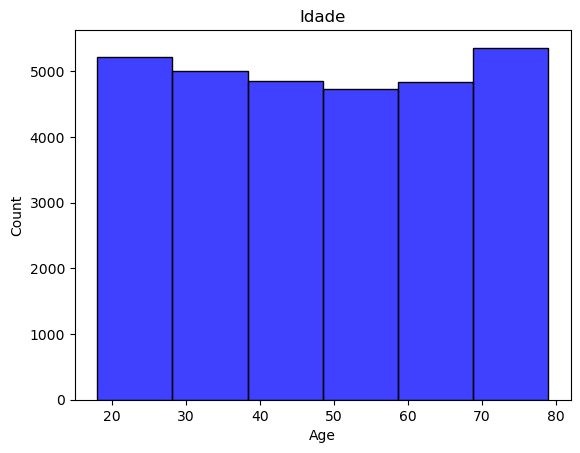

<Figure size 1000x700 with 0 Axes>

In [9]:
srn.histplot(dataset.iloc[:,0], kde=False, bins=6, color='blue').set(title='Idade')
fig = plt.figure(figsize= (10, 7))
